# 1. Business Case

 #### Based on the given features we need to predict the blood group
    

# 2. Importing Basic Libraries

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 3. Load the data

In [125]:
main_data = pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')
main_data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


In [147]:
data = main_data.copy()
data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


# 4. Domain Analysis

 **Basic understanding of features:**

- 1. Unnamed:0 :-This column represents the donor's unique ID.

- 2. Months since Last Donation :: This is the number of months since this donor’s most recent donation.

- 3. Number of Donations :This is the total number of donations that the donor has made.

- 4. Total Volume Donated (c.c.) :: This is the total amount of blood that the donor has donated in cubic centimetres.

- 5. Months since First Donation ::This is the number of months since the donor’s first donation.

- 6. Made Donation in March 2007 ::A binary variable representing whether he/she donated blood in March 2007 (1 stands for donating

- blood; 0 stands for not donating blood)

# 5. Basic Checks 

In [148]:
data.shape

(576, 6)

In [149]:
data.head(5)

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [150]:
data.tail(5)

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [152]:
data.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


# 6. Exploratory Data Analysis

In [153]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# a. Univariate Analysis

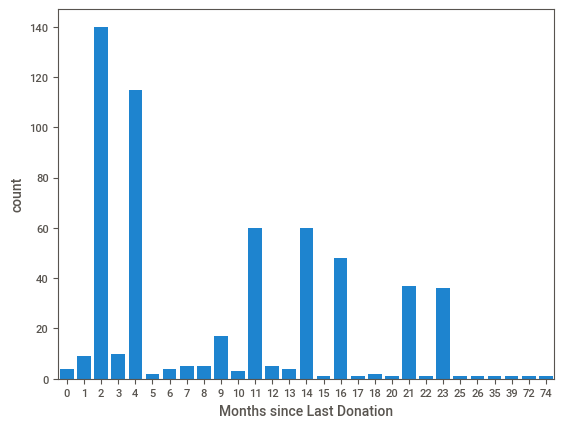

In [154]:
sns.countplot( x = 'Months since Last Donation',data = data)
plt.show()

### Insights Months since Last Donation

- *1. Most Recent Donations*: The highest peak at 2 months indicates that a large number of donors gave blood very recently.
- *2.Regular Donors*: There is another significant peak at 6 months, suggesting that a considerable number of donors donate blood biannually.
- *3.Less Frequent Donations*: There are smaller peaks at intervals such as 11, 14, and 16 months, indicating some donors have less regular donation patterns.
- *4.Longer Gaps*: There are fewer donations at intervals greater than 20 months, showing that fewer donors wait more than 20 months to donate again

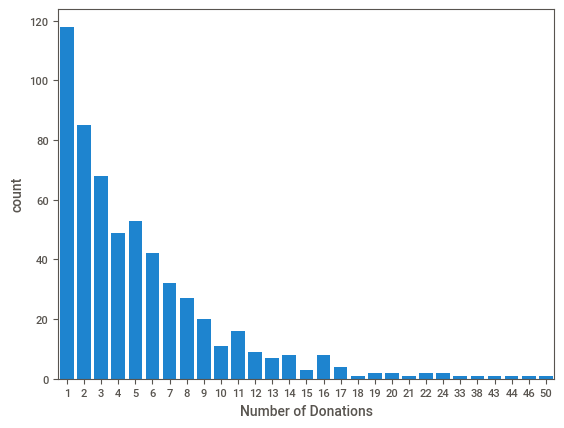

In [155]:
sns.countplot( x = 'Number of Donations',data = data)
plt.show()

### Insights Number of Donations

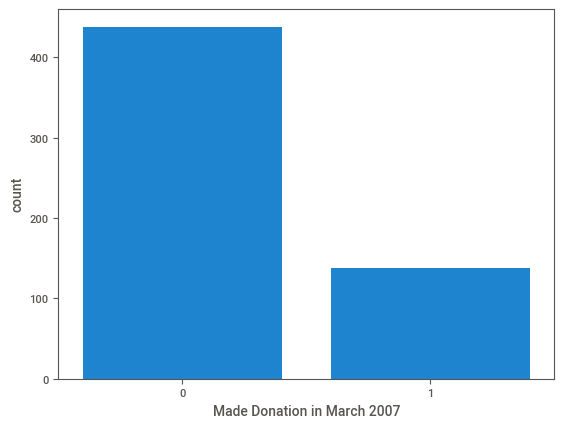

In [156]:
sns.countplot( x = 'Made Donation in March 2007',data = data)
plt.show()

### Insights Made Donation in March 2007

# b. Bivariate Analysis

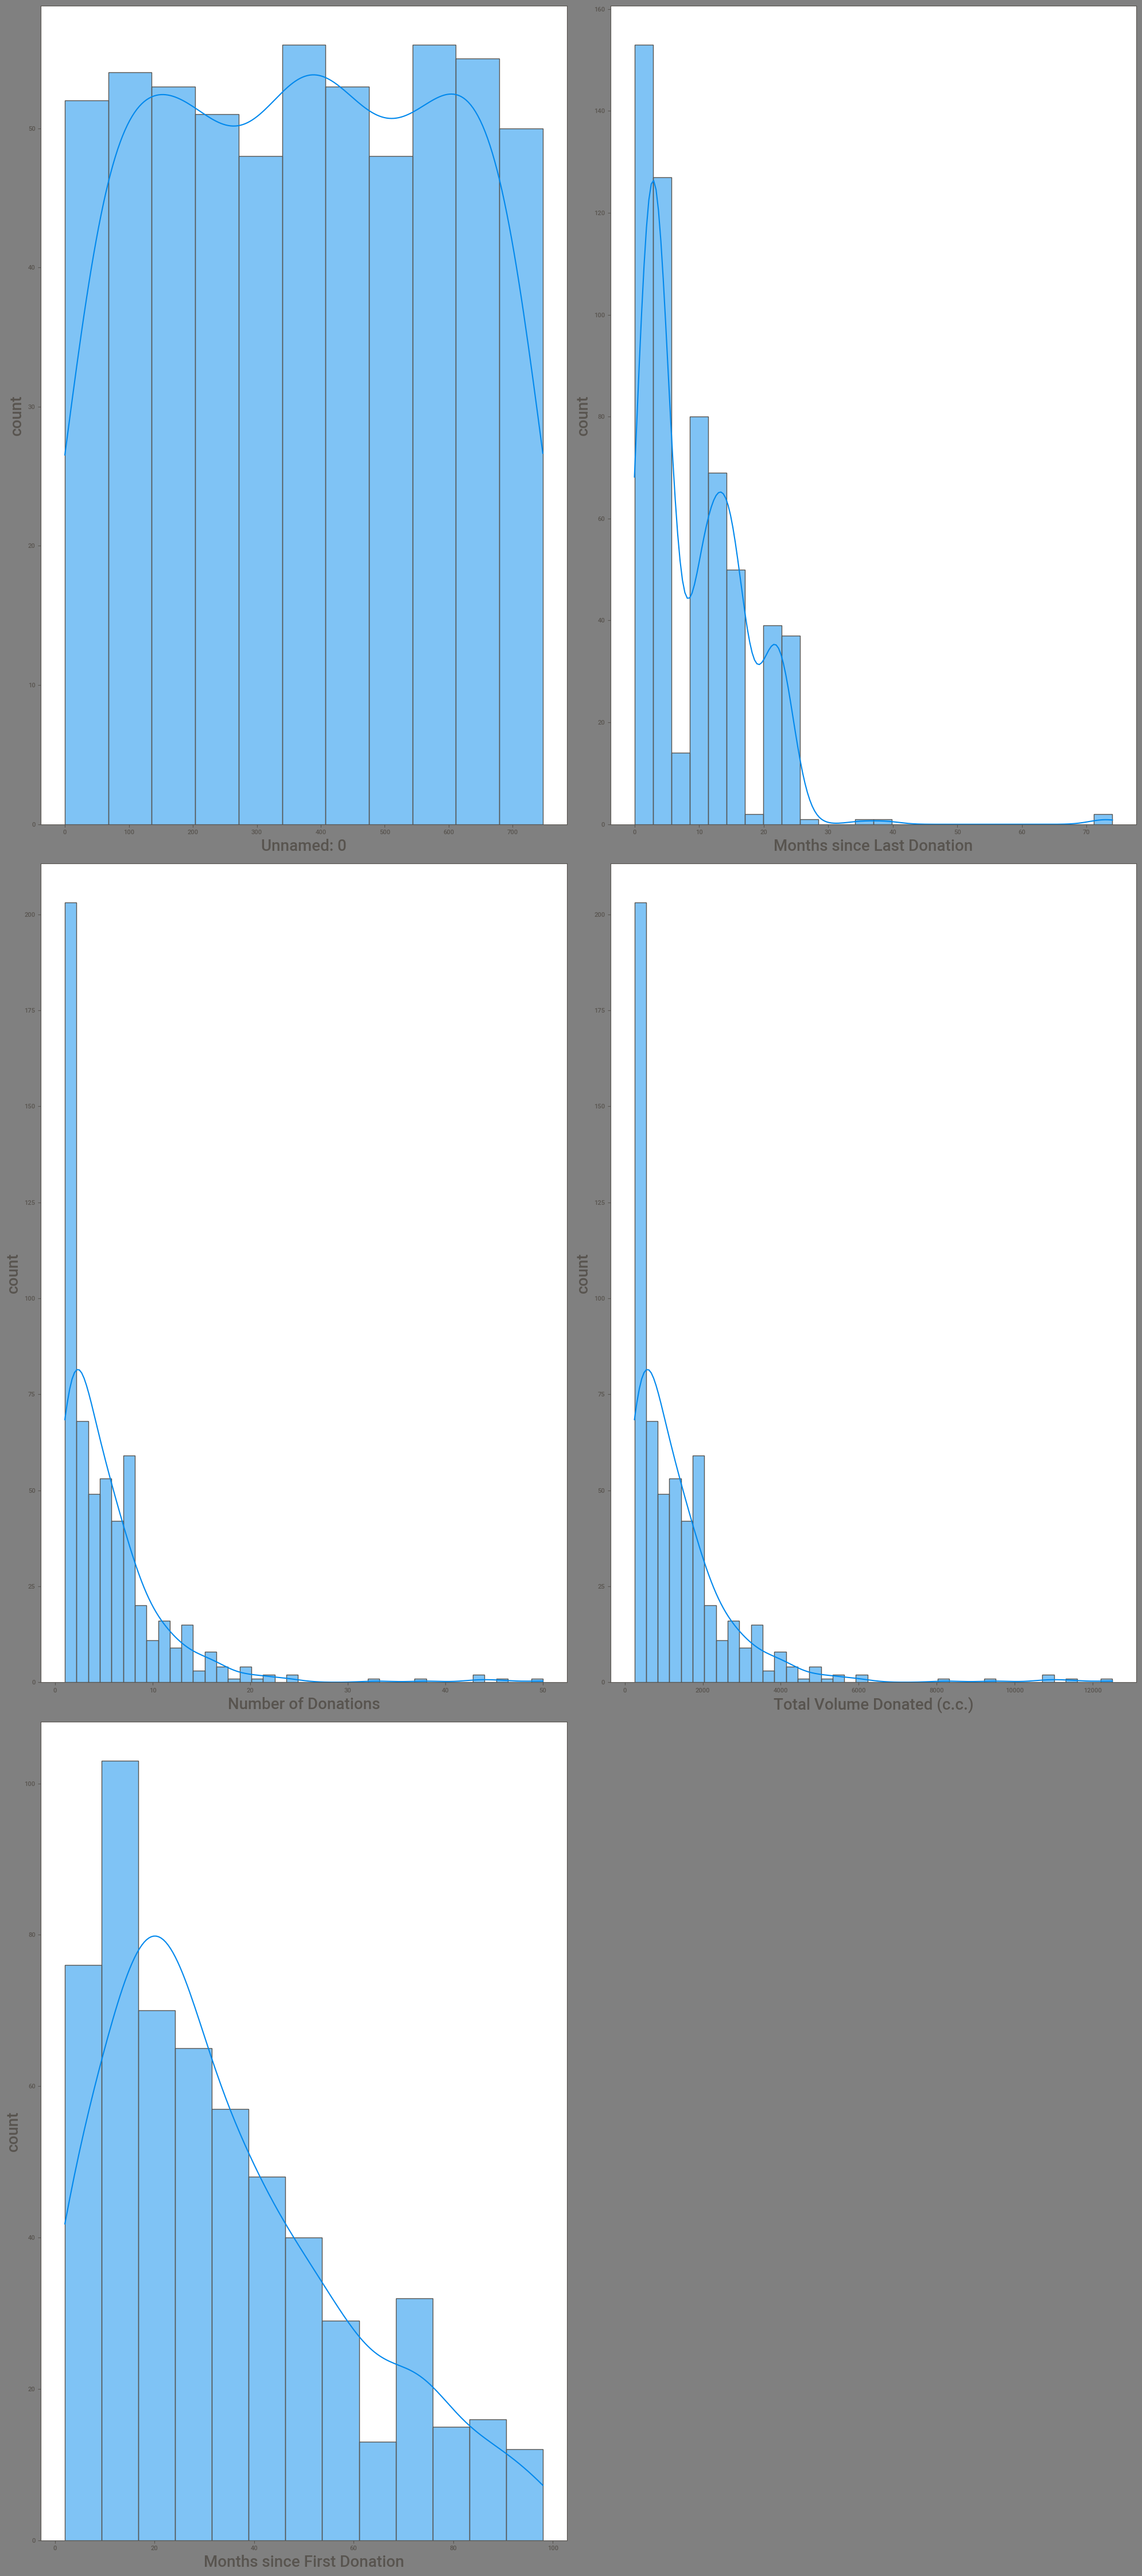

In [157]:
plt.figure(figsize = (20,45),facecolor = 'grey')
plotnumber = 1

for column in data:
    if plotnumber<= 5:
        plt.subplot(3,2,plotnumber)
        sns.histplot(data[column],kde = True)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('count',fontsize = 20)
    plotnumber+=1
plt.tight_layout()

# Multi Variate Analysis

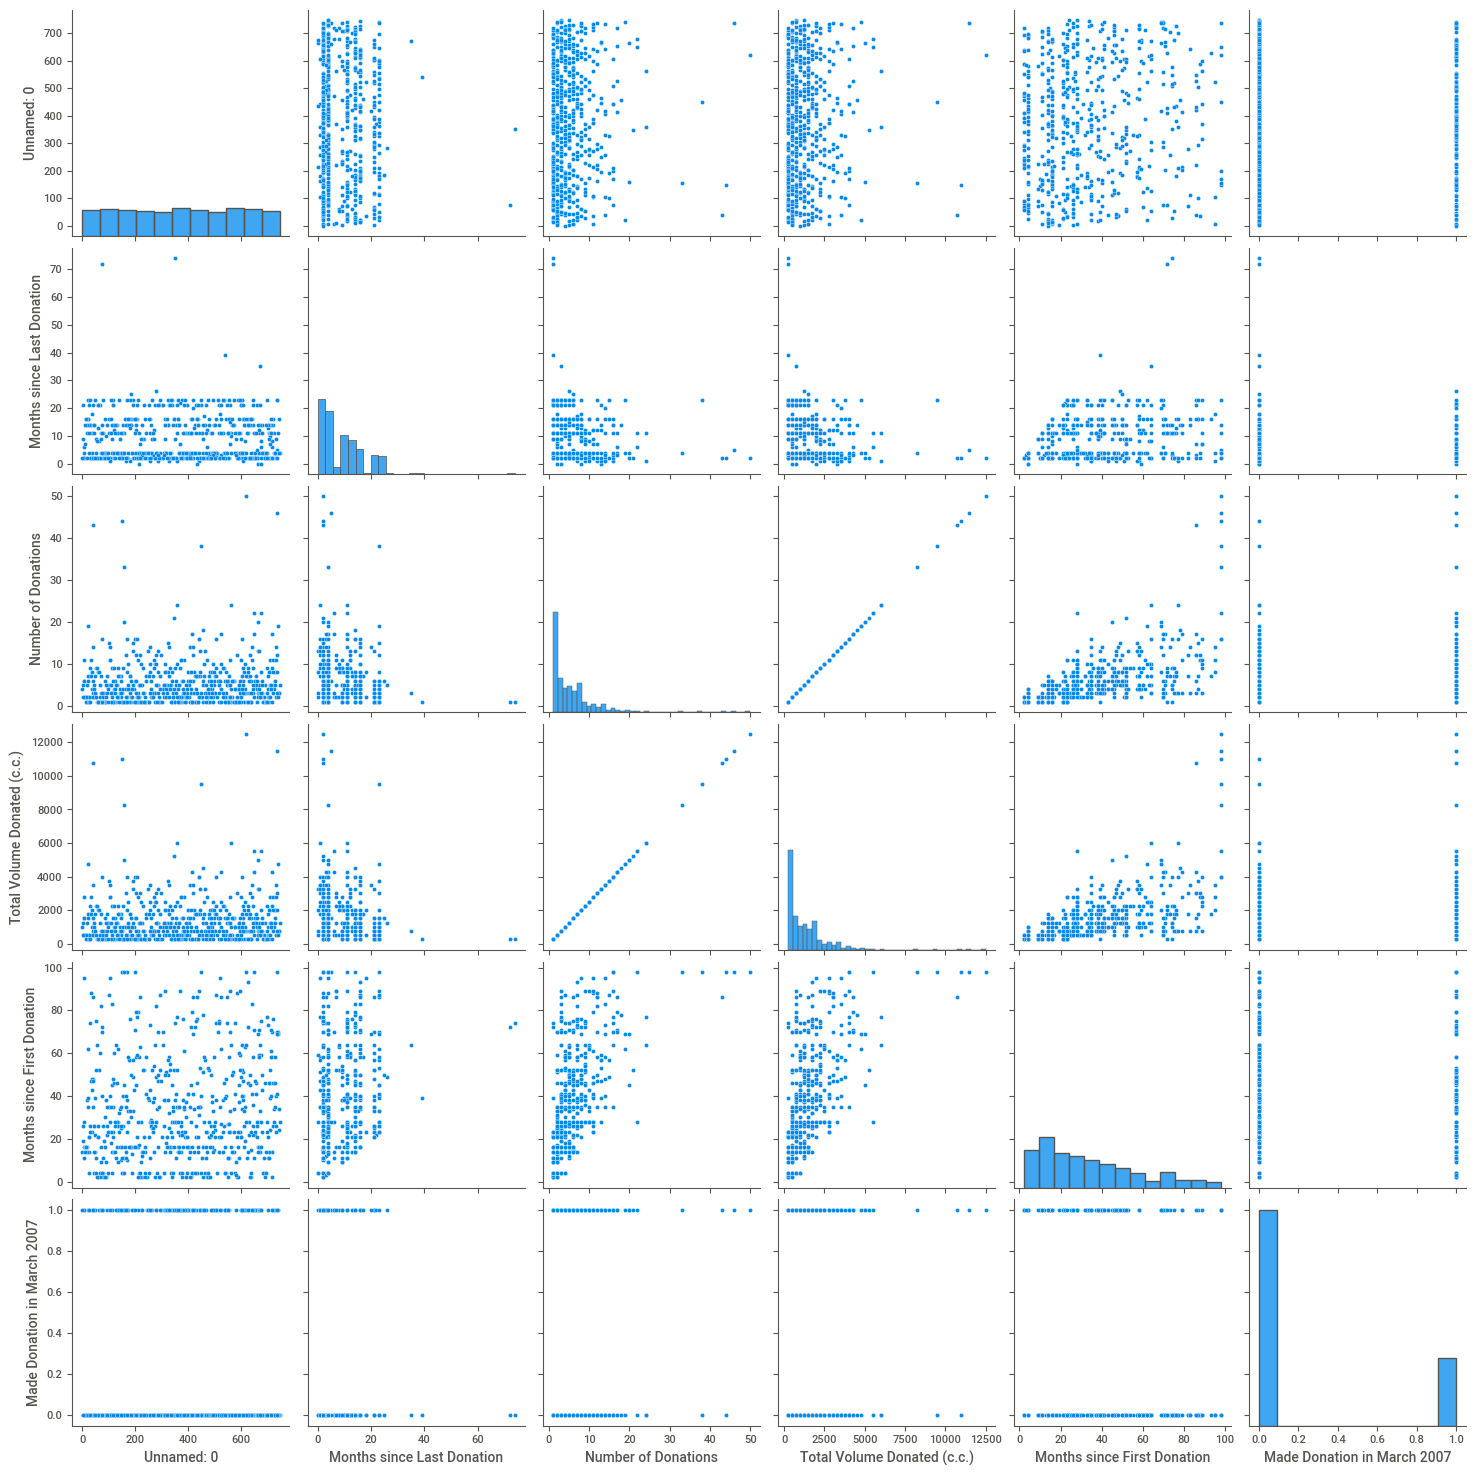

In [158]:
sns.pairplot(data = data)


# 7. Data Preprocessing

### Rename

In [159]:
data.rename({'Unnamed: 0':"ID", 'Months since Last Donation':"Last_Donation_Month", 'Number of Donations':"Total_Donations",
       'Total Volume Donated (c.c.)':"Total_Volume_Donated",'Months since First Donation':"Months_since_First_Donation",
       'Made Donation in March 2007':"prediction"},axis=1,inplace=True)

### Handling Null Values

In [161]:
data.isnull().sum()

ID                             0
Last_Donation_Month            0
Total_Donations                0
Total_Volume_Donated           0
Months_since_First_Donation    0
prediction                     0
dtype: int64

- There are no null values in this dataset. 

In [162]:
data.corr()

,ID,Last_Donation_Month,Total_Donations,Total_Volume_Donated,Months_since_First_Donation,prediction
ID,1.000000,-0.023217,0.063148,0.063148,0.098370,0.041925
Last_Donation_Month,-0.023217,1.000000,-0.159731,-0.159731,0.186899,-0.261234
Total_Donations,0.063148,-0.159731,1.000000,1.000000,0.622116,0.220615
Total_Volume_Donated,0.063148,-0.159731,1.000000,1.000000,0.622116,0.220615
Months_since_First_Donation,0.098370,0.186899,0.622116,0.622116,1.000000,-0.019819
prediction,0.041925,-0.261234,0.220615,0.220615,-0.019819,1.000000


<Axes: >

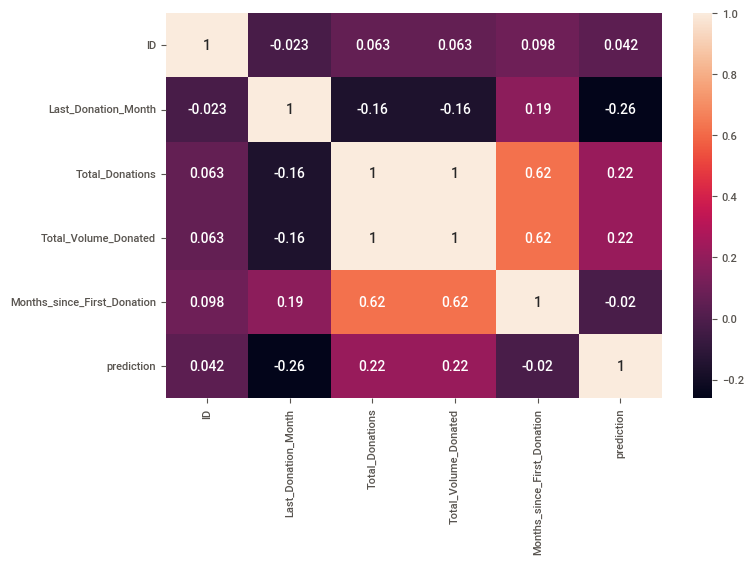

In [163]:
plt.figure(figsize = (8, 5))
sns.heatmap(data.corr(),annot=True)

 **Dropping the column which more and least correlated.**
- Total_Donation and Total_Volume_Donated. **Highly correlated** 
- And we are also dropping ID column. **Least correlated**

In [166]:
data.drop(columns=['ID','Total_Donations'],axis=1,inplace=True)
data

,Last_Donation_Month,Total_Volume_Donated,Months_since_First_Donation,prediction
0,2,12500,98,1
1,0,3250,28,1
2,1,4000,35,1
3,2,5000,45,1
4,1,6000,77,0
...,...,...,...,...
571,23,250,23,0
572,16,750,86,0
573,21,500,52,0
574,39,250,39,0


### Outliers

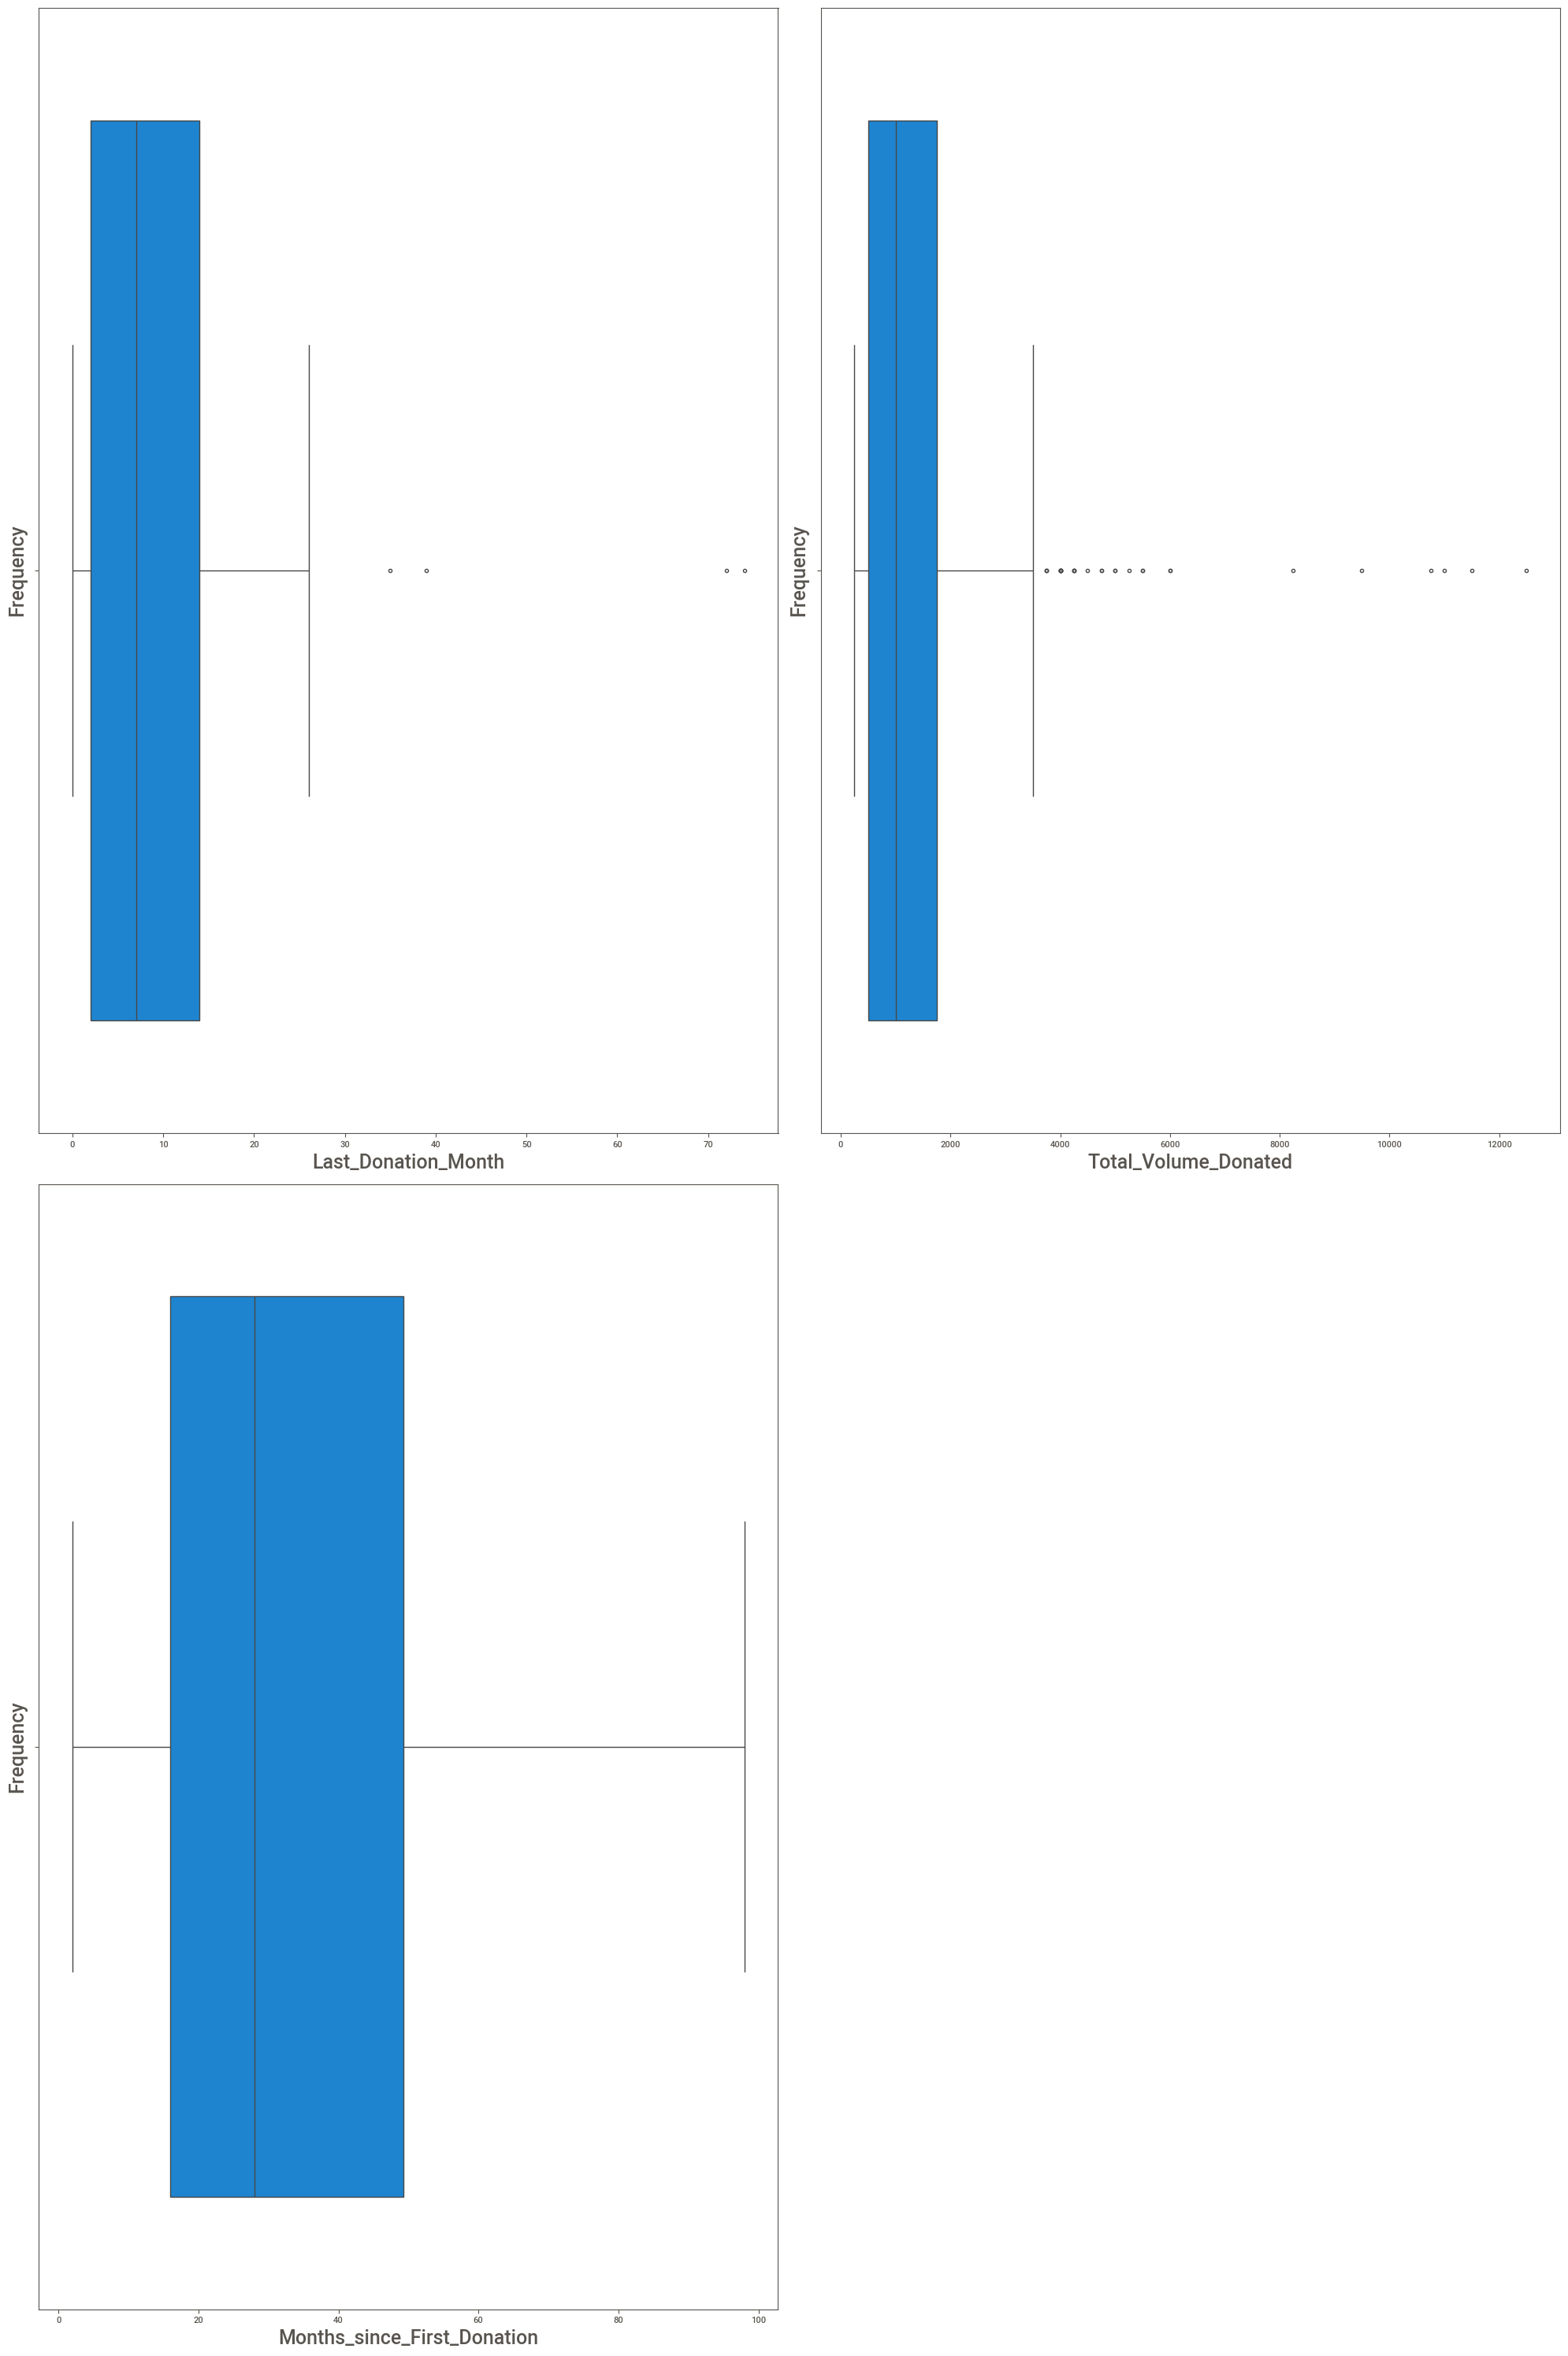

In [167]:
plt.figure(figsize =(20,30),facecolor = 'white')
plotnumber = 1
for i in data:
    if i != 'prediction':
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(x=i,data=data)
        plt.xlabel(i,fontsize=18)
        plt.ylabel('Frequency',fontsize=18)
    plotnumber+=1
plt.tight_layout()

# 9. Spitting the data

In [168]:
X = data.drop('prediction',axis=1)
y = data.prediction


In [173]:
X

,Last_Donation_Month,Total_Volume_Donated,Months_since_First_Donation
0,2,12500,98
1,0,3250,28
2,1,4000,35
3,2,5000,45
4,1,6000,77
...,...,...,...
571,23,250,23
572,16,750,86
573,21,500,52
574,39,250,39


In [174]:
y

0      1
1      1
2      1
3      1
4      0
      ..
571    0
572    0
573    0
574    0
575    0
Name: prediction, Length: 576, dtype: int64

In [179]:
## train,test splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [180]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(460, 3)
(116, 3)
(460,)
(116,)


# Scaling

In [183]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [185]:
X.columns

Index(['Last_Donation_Month', 'Total_Volume_Donated',
       'Months_since_First_Donation'],
      dtype='object')

In [186]:
X_train = pd.DataFrame(data = scaled_X_train, columns = ['Last_Donation_Month', 'Total_Volume_Donated',
       'Months_since_First_Donation'])

In [ ]:
X_test = pd.DataFrame(data = scaled_X_test, columns = [X_test = pd.DataFrame(data = scaled_X_test,columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'] )] )

# Model Implementation for Logistic

In [249]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [250]:
y_pred = model_lr.predict(X_test)

In [251]:
model_lr.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

# Model Evalutaion

In [236]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix


In [237]:
accuracy_score(y_test,y_pred)

0.25

In [238]:
confusion_matrix(y_test,y_pred)

array([[ 0, 87],
       [ 0, 29]], dtype=int64)

In [239]:
cr = classification_report(y_test,y_prediction)
print(cr)


              precision    recall  f1-score   support

           0       0.75      0.97      0.84        87
           1       0.25      0.03      0.06        29

    accuracy                           0.73       116
   macro avg       0.50      0.50      0.45       116
weighted avg       0.62      0.73      0.65       116



In [252]:
from imblearn.over_sampling import SMOTE
smote_lr = SMOTE(random_state=17)

In [253]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [254]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 351, 1: 109})
SMOTE Classes Counter({0: 351, 1: 351})


In [255]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_smote,y_smote)

LogisticRegression()

In [256]:
y_hat=model_lr.predict(X_test)

In [257]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.25

In [258]:
a = pd.crosstab(y_test,y_hat)
a

col_0,1
prediction,
0,87
1,29


In [248]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.25      1.00      0.40        29

    accuracy                           0.25       116
   macro avg       0.12      0.50      0.20       116
weighted avg       0.06      0.25      0.10       116



# Support vector Machine

## *Model Implementaion for SVM*

In [262]:
from sklearn.svm import SVC
svclassifier = SVC() 
svclassifier.fit(X_train, y_train)

SVC()

In [266]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        87
           1       0.00      0.00      0.00        29

    accuracy                           0.75       116
   macro avg       0.38      0.50      0.43       116
weighted avg       0.56      0.75      0.64       116



In [264]:
y_pred=svclassifier.predict(X_test)


In [267]:
a = pd.crosstab(y_test,y_pred)
a

col_0,0
prediction,
0,87
1,29


#### Smoted data for SVM

In [268]:
from sklearn.svm import SVC
svclassifier = SVC() 
svclassifier.fit(X_smote, y_smote)

SVC()

In [270]:
y_hat=svclassifier.predict(X_test)

In [271]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.75

In [272]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        87
           1       0.00      0.00      0.00        29

    accuracy                           0.75       116
   macro avg       0.38      0.50      0.43       116
weighted avg       0.56      0.75      0.64       116



In [273]:
a = pd.crosstab(y_test,y_hat)
a

col_0,0
prediction,
0,87
1,29
